# Scoring an Offline CAS Model with ESPPy

In [2]:
import swat as sw

Specify a CAS server and port.

In [3]:
s = sw.CAS('<casserver>',<port>)
s.loadactionset('deepNeural')
s.loadactionset('astore')

NOTE: Added action set 'deepNeural'.
NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.303s, sys: 0.0312s, mem: 0.211mb

In [4]:
iris_table = s.CASTable('iris', replace=True, blocksize=1)

In [7]:
iris_data = s.read_csv('iris.csv', casout=iris_table)

NOTE: Cloud Analytic Services made the uploaded file available as table IRIS in caslib CASUSER(user@domain).
NOTE: The table IRIS has been created in caslib CASUSER(user@domain) from binary data uploaded to Cloud Analytic Services.


In [8]:
iris_table.columninfo('iris')

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,Species,1,varchar,10,10,0,0
1,SepalLength,2,double,8,12,0,0
2,SepalWidth,3,double,8,12,0,0
3,PetalLength,4,double,8,12,0,0
4,PetalWidth,5,double,8,12,0,0


In [9]:
iris_table[['species']].freq()

,Column,CharVar,FmtVar,Level,Frequency
0,Species,Setosa,Setosa,1,50.0
1,Species,Versicolor,Versicolor,2,50.0
2,Species,Virginica,Virginica,3,50.0


In [10]:
nloOpts = dict(mode=dict(type='SYNCHRONOUS'), algorithm=dict(method='momentum', #1
clipgradmin=-1000,
clipgradmax=1000,
learningRate=0.01,
lrpolicy='step',
stepsize=8,
useLocking=True),
dropoutType='inverted', miniBatchSize=1, maxEpochs=10, logLevel=2)

iris_table.dnnTrain(inputs={'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'}, #2
target='Species', hidden=10, optimizer=nloOpts, nThreads=2,
modelOut=dict(name='iris_model', replace=True),
modelWeights=dict(name='iris_model_weights', replace=True))

NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 83.
NOTE:  The approximate memory cost is 1.00 MB.
NOTE:  Initializing each layer cost       0.00 (s).
NOTE:  The total number of threads on each worker is 2.
NOTE:  The total mini-batch size per thread on each worker is 1.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 2.
NOTE:  Target variable: Species
NOTE:  Number of levels for the target variable:      3
NOTE:  Levels for the target variable:
NOTE:  Level      0: Versicolor
NOTE:  Level      1: Virginica 
NOTE:  Level      2: Setosa    
NOTE:  Number of input variables:     4
NOTE:  Number of numeric input variables:      4
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  0          0.01          0.6594     0.3467     0.24
NOTE:  1          0.01          0.3159        0.1     0.00
NOTE:  2          0.01          0.2241    0.08667     0.00
NOTE:  3          0.01          0.1771    0.06667     0.00
NO

,Descr,Value
0,Model Name,iris_model
1,Model Type,Deep Neural Network
2,Number of Layers,3
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Fully Connected Layers,1
6,Number of Weight Parameters,70
7,Number of Bias Parameters,13
8,Total Number of Model Parameters,83
9,Approximate Memory Cost for Training (MB),1


In [11]:
s.dnnExportModel(model='iris_model', initWeights='iris_model_weights', casout=dict(name='iris_astore',
replace=True))

NOTE: Wrote 8328 bytes to the savestate file iris_astore.


,casLib,Name
0,CASUSER(miharv@CARYNT),iris_astore


In [12]:
iris_ast = s.astore.download(rstore='iris_astore')
with open('iris_dnn.astore','wb') as file:
    file.write(iris_ast['blob']) 

In [13]:
s.astore.describe(rstore='iris_astore')

[Key]

                                         Key
 0  634F87005C33116FC284C32FDE878B28458522EC

[Description]

          Attribute               Value
 0  Analytic Engine           deeplearn
 1     Time Created  22Oct2018:11:51:42

[InputVariables]

 Input Variables
 
           Name  Length   Role      Type RawType FormatName
 0   PetalWidth     8.0  Input  Interval     Num           
 1  PetalLength     8.0  Input  Interval     Num           
 2   SepalWidth     8.0  Input  Interval     Num           
 3  SepalLength     8.0  Input  Interval     Num           

[OutputVariables]

 Output Variables
 
                   Name  Length       Type                          Label
 0  P_SpeciesVersicolor     8.0        Num  Predicted: Species=Versicolor
 1   P_SpeciesVirginica     8.0        Num   Predicted: Species=Virginica
 2      P_SpeciesSetosa     8.0        Num      Predicted: Species=Setosa
 3            I_Species    10.0  Character                  Into: Species

+ Elapsed: 0.811s, sys: 0.0469s, mem: 2.88mb

In [14]:
import esppy
%matplotlib inline
import pandas as pd

In [15]:
iris_data = pd.read_csv('iris.csv', header=0)

In [19]:
esp = esppy.ESP('http://<host>:<port>')
esp.server_info

{'analytics-license': True,
 'engine': 'esp',
 'http': 54321,
 'pubsub': 64321,
 'version': '5.2'}

In [20]:
esp.get_projects()

{}

In [21]:
fsProject = esp.create_project('fsProject')

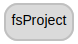

In [22]:
fsProject

In [23]:
src = esp.SourceWindow(schema=('id*:int64', 'Species:string','SepalLength:double', 'SepalWidth:double',
'PetalLength:double', 'PetalWidth:double'),
index_type='empty', insert_only=True)
fsProject.windows['w_data'] = src

In [24]:
model_reader = esp.ModelReaderWindow()
fsProject.windows['w_reader'] = model_reader

In [25]:
model_request = esp.SourceWindow(schema=('req_id*:int64', 'req_key:string', 'req_val:string'),
index_type='empty', insert_only=True)
fsProject.windows['w_request'] = model_request

In [26]:
model_score = esp.ScoreWindow(schema=('id*:int64', 'Species:string', 'I_Species:string',
'P_SpeciesVersicolor:double', 'P_SpeciesVirginica:double',
'P_SpeciesSetosa:double'))
model_score.add_offline_model(model_type='astore')
fsProject.windows['w_score'] = model_score

In [27]:
fitstat = esp.calculate.FitStat(schema=('id*:int64', 'Species:string', 'I_Species:string',
'P_SpeciesVersicolor:double', 'P_SpeciesVirginica:double',
'P_SpeciesSetosa:double', 'mceOut:double','mcllOut:double'),
classLabels='Versicolor,Virginica,Setosa', windowLength=10)
fitstat.set_inputs(inputs=('P_SpeciesVersicolor:double','P_SpeciesVirginica:double','P_SpeciesSetosa:double'),
response='Species:string')
fitstat.set_outputs(mceOut='mceOut', mcllOut='mcllOut')
fsProject.windows['w_fitstat'] = fitstat

In [28]:
roc = esp.calculate.ROC(schema=('id*:int64', 'Species:string', 'I_Species:string',
'P_SpeciesVersicolor:double', 'P_SpeciesVirginica:double',
'P_SpeciesSetosa:double', 'binIdOut*:int64', 'cOut:double'),
event='Versicolor', windowLength=10)
roc.set_inputs(input=('P_SpeciesVersicolor:double'),response='Species:string')
roc.set_outputs(binIdOut='binIdOut*:int64',cOut='cOut')
fsProject.windows['w_roc'] = roc

In [29]:
#Create an aggregate window to compute the average mcllOut by Species

agg = esp.AggregateWindow(schema=('Species*:string','AveragemcllOut:double'),pubsub=True)
agg.field_expressions.append('ESP_aAve(mcllOut)')
fsProject.windows['w_agg'] = agg

In [30]:
src.add_target(model_score, role='data')
model_request.add_target(model_reader, role='request')
model_reader.add_target(model_score, role='model')
model_score.add_target(fitstat, role='data')
model_score.add_target(roc, role='data')
#roc.add_target(agg, role='data') 
fitstat.add_target(agg,role='data')

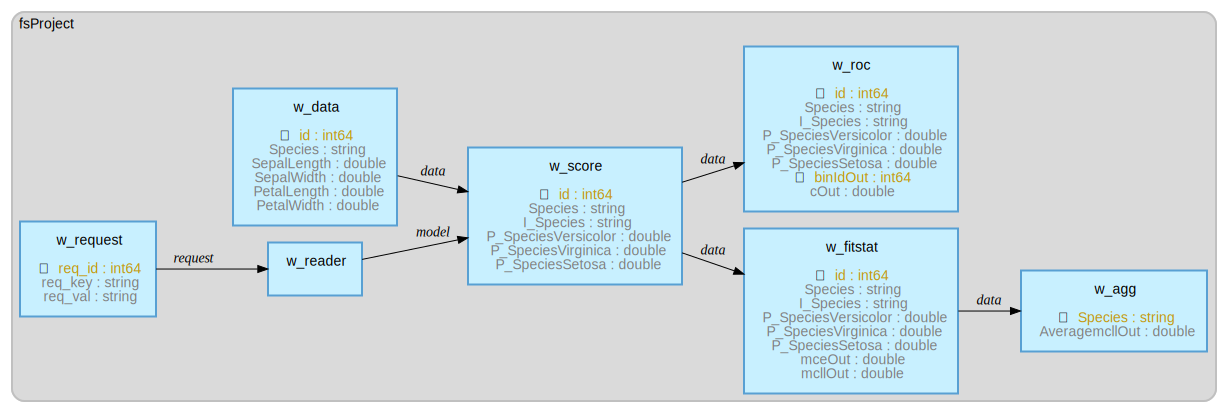

In [31]:
fsProject.get_windows()
fsProject.to_graph(schema=True)

In [32]:
esp.load_project(fsProject)
esp.get_projects()

{'fsProject': Project(name='fsProject')}

In [33]:
myiris= iris_data
myiris.index.name='id'
myiris

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
id,,,,,
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2
5,Setosa,48,31,16,2
6,Setosa,52,34,14,2
7,Setosa,49,36,14,1
8,Setosa,44,32,13,2


In [34]:
src.publish_events(myiris, pause=1000)
src.subscribe()
src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
Species        0 non-null object
SepalLength    0 non-null float64
SepalWidth     0 non-null float64
PetalLength    0 non-null float64
PetalWidth     0 non-null float64
dtypes: float64(4), object(1)
memory usage: 0.0+ bytes


In [35]:
src.streaming_line(x='id', y=['SepalLength', 'SepalWidth'], steps=100000.0, interval=1000, max_data=50)

In [36]:
pub = model_request.create_publisher(blocksize=1, rate=0, pause=0,
                                     dateformat='%Y%dT%H:%M:%S.%f', opcode='insert', format='csv')
pub.send('i,n,1,"action","load"\n')
pub.send('i,n,2,"type","astore"\n')
pub.send('i,n,3,"reference","/r/ge.unx.sas.com/vol/vol210/u21/miharv/iris_dnn.astore"\n')
pub.send('i,n,4,,\n')
pub.close()

In [37]:
fitstat.subscribe(mode='streaming') 
fitstat.streaming_line(x='id', y='mcllOut', steps=100000.0, interval=1000, max_data=50)

In [38]:
from esppy.plotting import StreamingChart

streamChart=agg.streaming_bar('Species', 'AveragemcllOut')
streamChart